In [ ]:
# Works best with jupyter-notebook

In [1]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math
from collections import namedtuple

from spatialmath import *
from spatialmath.base import *

from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 4.4

Let us first look at how to create a 1D trajectory with multiple via points

In [3]:
#Set a first point of 10, a last point of 30 and via points of 10, 20, 10 and the last point
first = np.array(10)
last  = np.array(10)

via = np.array([
    [10],
    [20],
    [10]
    ])

print("First: ", first, "\nLast: ", last, "\nVia Points: \n", via.squeeze())


First:  10 
Last:  10 
Via Points: 
 [10 20 10]


Compute a trajectory with via points using the toolbox function **mstraj()**.

Params: 
 - via points (one per row)
 - time step <secs> (dt)
 - acceleration time <secs> (tacc)
 - max speed, defaults to none <units/sec> (qd)
 - max time of each motion segment <secs> (tseg)
 - initial via point position
 - initial via point velocity
 - returns trajectory plus extra info <tuple> as a named tuple
    
The return value is a namedtuple (named ``mstraj``) with elements:
    
        - ``t``  the time coordinate as a numpy ndarray, shape=(K,)
        - ``q``  the axis values as a numpy ndarray, shape=(K,N)
        - ``arrive`` a list of arrival times for each segment
        - ``info`` a list of named tuples, one per segment that describe the
          slowest axis, segment time,  and time stamp
        - ``via`` the passed set of via points
    
    The  trajectory proper is (``traj.t``, ``traj.q``).  The trajectory is a matrix has one row per time step, and one column per axis.


In [4]:
speed = 1   # velocity is 1 unit/second
dt    = 1 # time interval 0.1 seconds
tacc  = 0   # acceleration time 2 seconds

out = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

1 0.1 [      11]
2 0.2 [      12]
3 0.3 [      13]
4 0.4 [      14]
5 0.5 [      15]
6 0.6 [      16]
7 0.7 [      17]
8 0.8 [      18]
9 0.9 [      19]
10 1.0 [      20]
1 0.1 [      19]
2 0.2 [      18]
3 0.3 [      17]
4 0.4 [      16]
5 0.5 [      15]
6 0.6 [      14]
7 0.7 [      13]
8 0.8 [      12]
9 0.9 [      11]
10 1.0 [      10]


/media/juan/sdd/python/toolbox/robotics-toolbox-python/roboticstoolbox/tools/trajectory.py:727: RuntimeWarning: invalid value encountered in true_divide
  qd = dq / tseg
/media/juan/sdd/python/toolbox/robotics-toolbox-python/roboticstoolbox/tools/trajectory.py:267: RuntimeWarning: invalid value encountered in true_divide
  t = tv.flatten() / tscal


In [5]:
print("The trajectory lasts a total of ", out.t[-1], " secs.")

print("The segments times are as follows \n", out.arrive)
 
print("My via points are: \n", out.via.squeeze())

#print("Print out every nth point of the trajectory \n", out.q[0::10])
#out.info # Useful with more axis

The trajectory lasts a total of  19  secs.
The segments times are as follows 
 [       0       10       20]
My via points are: 
 [10 20 10]


Plot the trajectory

<IPython.core.display.Javascript object>


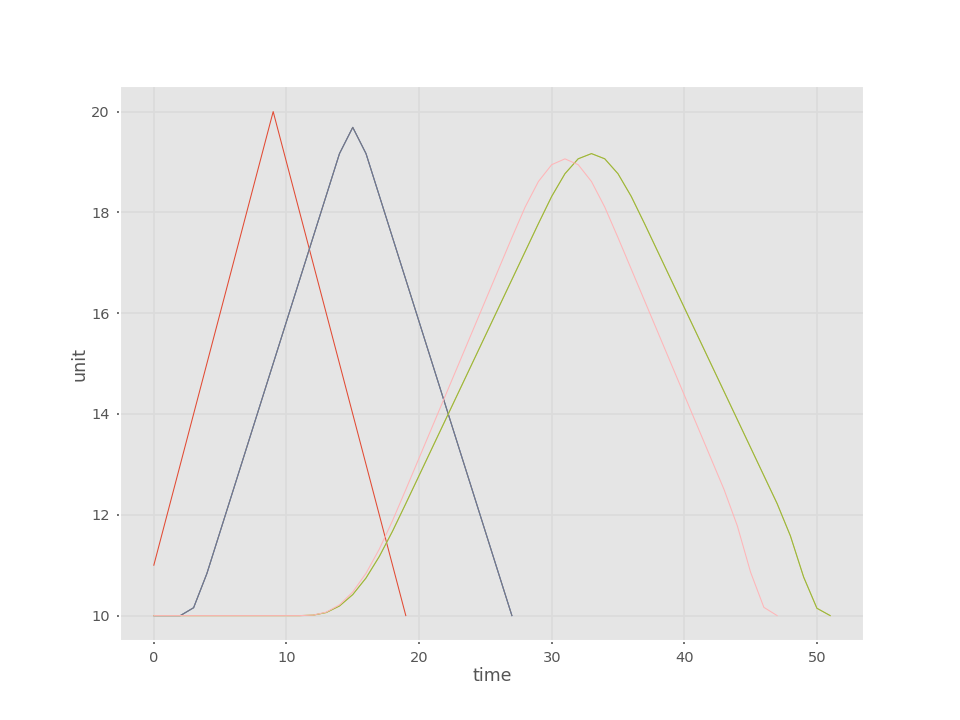

In [6]:
fig1=plt.figure(1);
plt.plot(out.t, out.q);
plt.xlabel('time');
plt.ylabel('unit');

Increasing the acceleration time from 0 to 2 seconds, increases the duration of our acceleration (slows down the trajectory).

So, to achieve starting/final via points smoothly, the trajectory moves away from the via points.

In [14]:
# control precision
np.set_printoptions(precision=2)

speed = 1   
dt    = 1 
tacc  = 2 

out = tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

2 0.5 [10.]
3 0.75 [10.]
2 0.16666666666666666 [11.67]
3 0.25 [12.5]
4 0.3333333333333333 [13.33]
5 0.4166666666666667 [14.17]
6 0.5 [15.]
7 0.5833333333333334 [15.83]
8 0.6666666666666666 [16.67]
9 0.75 [17.5]
10 0.8333333333333334 [18.33]
11 0.9166666666666666 [19.17]
2 0.16666666666666666 [18.33]
3 0.25 [17.5]
4 0.3333333333333333 [16.67]
5 0.4166666666666667 [15.83]
6 0.5 [15.]
7 0.5833333333333334 [14.17]
8 0.6666666666666666 [13.33]
9 0.75 [12.5]
10 0.8333333333333334 [11.67]
11 0.9166666666666666 [10.83]


In [15]:
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

Text(89.0, 0.5, 'unit')

In [16]:
print("The trajectory lasts a total of ", out.t[-1], " secs.")

print("The four segments arrive at the following times: \n", out.arrive)
 
print("My via points are: \n", out.via.squeeze())

print("Printing out every nth point of the trajectory \n", out.q[0::4])
# out.info # Useful with more axis

The trajectory lasts a total of  27  secs.
The four segments arrive at the following times: 
 [ 4. 16. 28.]
My via points are: 
 [10 20 10]
Printing out every nth point of the trajectory 
 [[10.  ]
 [10.83]
 [14.17]
 [17.5 ]
 [19.17]
 [15.83]
 [12.5 ]]


In [17]:
#Increasing acceleration time from 2 to 8 seconds
speed = 1   
dt    = 1 
tacc  = 8 

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

5 0.3125 [10.]
6 0.375 [10.]
7 0.4375 [10.]
8 0.5 [10.]
9 0.5625 [10.]
10 0.625 [10.]
11 0.6875 [10.]
12 0.75 [10.]
5 0.2777777777777778 [12.78]
6 0.3333333333333333 [13.33]
7 0.3888888888888889 [13.89]
8 0.4444444444444444 [14.44]
9 0.5 [15.]
10 0.5555555555555556 [15.56]
11 0.6111111111111112 [16.11]
12 0.6666666666666666 [16.67]
13 0.7222222222222222 [17.22]
14 0.7777777777777778 [17.78]
5 0.2777777777777778 [17.22]
6 0.3333333333333333 [16.67]
7 0.3888888888888889 [16.11]
8 0.4444444444444444 [15.56]
9 0.5 [15.]
10 0.5555555555555556 [14.44]
11 0.6111111111111112 [13.89]
12 0.6666666666666666 [13.33]
13 0.7222222222222222 [12.78]
14 0.7777777777777778 [12.22]


In [19]:
#plot
#fig3=plt.figure(3)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

Text(89.0, 0.5, 'unit')

If we increase the velocity, the amount of time taken to execute the trajectory is reduced.

In [20]:
speed = 4   
dt    = 1 
tacc  = 8 

out=tr.mstraj(via, dt, tacc, qdmax=speed, q0=first)

#plot
#fig5=plt.figure(5)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')

5 0.3125 [10.]
6 0.375 [10.]
7 0.4375 [10.]
8 0.5 [10.]
9 0.5625 [10.]
10 0.625 [10.]
11 0.6875 [10.]
12 0.75 [10.]
5 0.3125 [13.12]
6 0.375 [13.75]
7 0.4375 [14.38]
8 0.5 [15.]
9 0.5625 [15.62]
10 0.625 [16.25]
11 0.6875 [16.88]
12 0.75 [17.5]
5 0.3125 [16.88]
6 0.375 [16.25]
7 0.4375 [15.62]
8 0.5 [15.]
9 0.5625 [14.38]
10 0.625 [13.75]
11 0.6875 [13.12]
12 0.75 [12.5]


Text(89.0, 0.5, 'unit')

We can set the duration of each segment instead of the velocity. 

The time duration of each segment is passed via a vector to the function. 

Segment 1: 10 secs

Segment 2: 20 secs

In [25]:
dt   = 0.1 # time interval 0.1 seconds
tacc = 2 # acceleration time 4 seconds
print(via)
out=tr.mstraj(via, dt, tacc, tsegment=[0, 10, 20], q0=first)

[[10]
 [20]
 [10]]
1.1 0.11000000000000001 [11.1]
1.2000000000000002 0.12000000000000002 [11.2]
1.3000000000000003 0.13000000000000003 [11.3]
1.4000000000000004 0.14000000000000004 [11.4]
1.5000000000000004 0.15000000000000005 [11.5]
1.6000000000000005 0.16000000000000006 [11.6]
1.7000000000000006 0.17000000000000007 [11.7]
1.8000000000000007 0.18000000000000008 [11.8]
1.9000000000000008 0.19000000000000009 [11.9]
2.000000000000001 0.2000000000000001 [12.]
2.100000000000001 0.2100000000000001 [12.1]
2.200000000000001 0.2200000000000001 [12.2]
2.300000000000001 0.23000000000000012 [12.3]
2.4000000000000012 0.24000000000000013 [12.4]
2.5000000000000013 0.2500000000000001 [12.5]
2.6000000000000014 0.2600000000000001 [12.6]
2.7000000000000015 0.27000000000000013 [12.7]
2.8000000000000016 0.28000000000000014 [12.8]
2.9000000000000017 0.29000000000000015 [12.9]
3.0000000000000018 0.30000000000000016 [13.]
3.100000000000002 0.31000000000000016 [13.1]
3.200000000000002 0.3200000000000002 [13.2

<IPython.core.display.Javascript object>


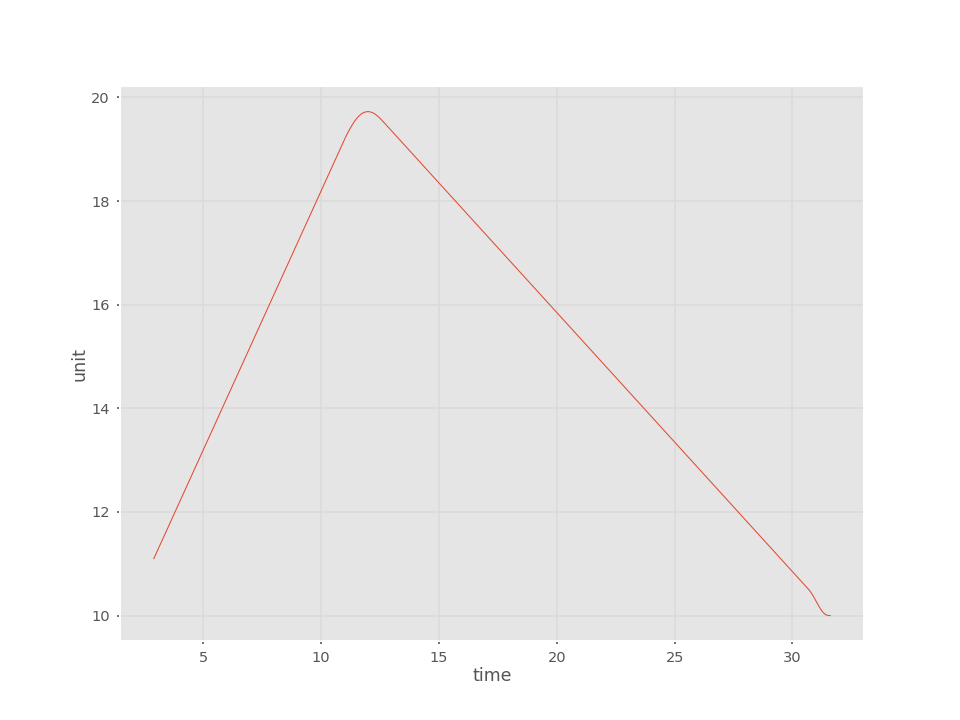

Text(0, 0.5, 'unit')

In [26]:
#plot
fig6=plt.figure(6)
plt.plot(out.t, out.q)
plt.xlabel('time')
plt.ylabel('unit')